In [63]:
aws-okta exec mist-data-science -- aws s3 sync s3://mist-data-science-dev/spark_jobs/ruchit-dev/models/ ~/Documents/Work/rrm-local/ruchit-dev/model
s

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

class SCC:
    def __init__(self, graph):
        self._graph = graph
        self.nodes = self.getNodes()
        self.inverse_nodes = {node : i for i, node in enumerate(self.nodes)}
        self.ids = [-1]*len(self.nodes)  # Initialize all nodes unvisited
        self.low = [-1]*len(self.nodes)  # Initialize all nodes low-link is unvisited
        self.onStack = [False]*len(self.nodes)  # Initialize all node onStack to False
        self.stack = []  # Stack to keep track of visited nodes
        self.nodeId = 0
        self.scc_map = {}

        
    def printStack(self):
        print([self.nodes[i] for i in self.stack])

    def getNodes(self):
        _nodes=set([])
        for k, v in self._graph.items():
            items = [k] + v
            for item in items:
                _nodes.add(item)
        return list(_nodes)
    
    def dfs(self, curr):
        self.stack.append(curr)
        self.onStack[curr] = True
        #print(f"{self.nodes[curr]}={curr}")
        self.ids[curr] = self.nodeId
        self.low[curr] = self.nodeId
        self.nodeId = self.nodeId + 1


        # print(low)
        if self.nodes[curr] in self._graph:
            for neighbour in self._graph[self.nodes[curr]]:
                to = self.inverse_nodes[neighbour]
                if self.ids[to] == -1: # Unvisited
                    self.dfs(to)  # Run dfs on neighbour if neighbour is unvisited
                if to in self.stack: 
                    self.low[curr] = min(self.low[curr], self.low[to])  # If neighbour on stack then 
                                                         # Min the low-link value of current node with neighbour

        # After visiting all adjacent nodes
        # check if current node is root of SCC
        # If yes, then pop of all nodes upto and including current node
        if self.ids[curr] == self.low[curr]:
            while True:
                #self.printStack()
                temp = self.stack.pop(-1)
                self.onStack[temp] = False
                self.low[temp] = self.ids[curr]
                if temp == curr:
                    break
        #self.printStack()

    def get_scc(self):
        for i, node in enumerate(self.nodes):
            if self.ids[i] == -1:
                self.dfs(i)
                
        for k, v in enumerate(self.low):
            self.scc_map.setdefault(v, []).append(self.nodes[k])

        # Only save non-unique components
        for k in list(self.scc_map.keys()):
            if len(self.scc_map[k])<2:
                # continue
                _ = self.scc_map.pop(k)    

        return self.scc_map

def count_dict(map_obj):
    count = {}
    for key in map_obj: 
        if isinstance(map_obj[key], list): 
            count[key] = len(map_obj[key])
    return count

In [58]:
graph1 = {'a':['b','c','d'], 'b':['c','e'], 'd':['e','f','g'], 'e':['a','c']}
graph2 = {'a':['b','c','d'], 'b':['c'], 'd':['e','f','g'], 'e':['a','c']}
graph3 = {'a':['b','c','e'], 'b':['c'], 'd':['e','f','g'], 'e':['a','c']}
graph4 = {'a':['b','c','f'], 'b':['c'], 'd':['e','f','g'], 'e':['a','c']}
scc = SCC(graph1)
print(scc.get_scc())

{0: ['b', 'd', 'e', 'a']}


##### Check python ####
Graph1
SCC={0: ['b', 'd', 'e', 'a']}
Graph2
SCC={2: ['d', 'e', 'a']}
Graph3
SCC={3: ['e', 'a']}
Graph4
SCC={}




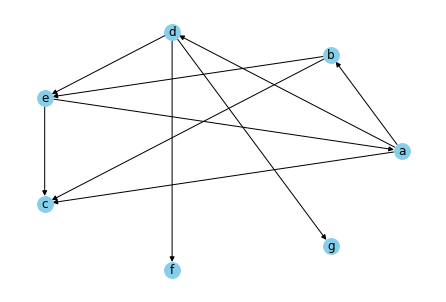

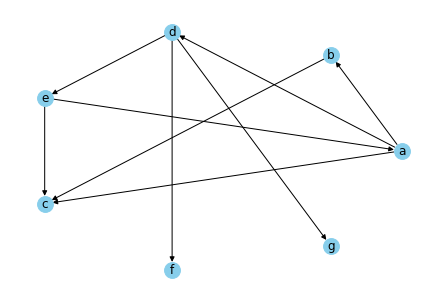

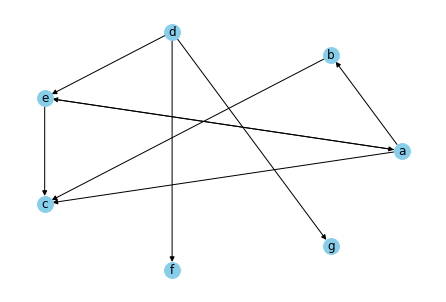

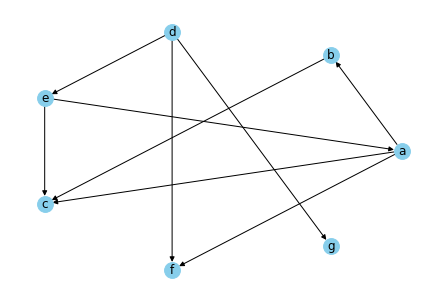

In [59]:
def scc_unittest():
    graph1 = {'a':['b','c','d'], 'b':['c','e'], 'd':['e','f','g'], 'e':['a','c']}
    graph2 = {'a':['b','c','d'], 'b':['c'], 'd':['e','f','g'], 'e':['a','c']}
    graph3 = {'a':['b','c','e'], 'b':['c'], 'd':['e','f','g'], 'e':['a','c']}
    graph4 = {'a':['b','c','f'], 'b':['c'], 'd':['e','f','g'], 'e':['a','c']}
    
    layout = nx.circular_layout
    size = 250
    print('##### Check python ####')
    print('Graph1')
    G = nx.DiGraph(graph1)
    plt.figure()
    nx.draw(G, with_labels=True, node_size=size, node_color="skyblue", pos=layout(G))
    scc = SCC(graph1)
    print(f'SCC={scc.get_scc()}')
    print('Graph2')
    plt.figure()
    G = nx.DiGraph(graph2)
    nx.draw(G, with_labels=True, node_size=size, node_color="skyblue", pos=layout(G))
    scc = SCC(graph2)
    print(f'SCC={scc.get_scc()}')
    print('Graph3')
    plt.figure()
    G = nx.DiGraph(graph3)
    nx.draw(G, with_labels=True, node_size=size, node_color="skyblue", pos=layout(G))
    scc = SCC(graph3)
    print(f'SCC={scc.get_scc()}')
    print('Graph4')
    plt.figure()
    G = nx.DiGraph(graph4)
    nx.draw(G, with_labels=True, node_size=size, node_color="skyblue", pos=layout(G))
    scc = SCC(graph4)
    print(f'SCC={scc.get_scc()}')
    print('\n')
    
scc_unittest()

### Print ALL cycles

In [53]:
class Cycles:
    def __init__(self, graph, debug=False):
        self._graph = graph
        self.nodes = self.getNodes()
        self.nodeMap = {node : i for i, node in enumerate(self.nodes)}
        self.visited = ['NOT_VISITED' for _ in range(len(self.nodes))]  # Initialize all nodes unvisited
        self.stack = []  # Stack to keep track of visited nodes
        self.cycles = []
        self.debug = debug # Bool for debug output

    def getNodes(self):
        _nodes=set([])
        for k, v in self._graph.items():
            items = [k] + v
            for item in items:
                _nodes.add(item)
        return list(_nodes)

    def getStack(self):
        _stack = [self.nodes[i] for i in self.stack]
        return _stack
        
    def printCycles(self):
        for cycle in self.cycles:
            print(cycle)
    
    def addCycle(self, v):
        if self.debug: print(f'Back-edge detect at: {self.nodes[v]}')
        if self.debug: print(f'Cycle-detect Stack-->{self.getStack()}')
        self.stack2 = []
        self.stack2.append(self.stack[-1])
        self.stack.pop()
        cycle = []
        #print(f'stack2={self.stack2}')
        while self.stack2[-1] != v:
            self.stack2.append(self.stack[-1])
            self.stack.pop()
        while len(self.stack2) > 0: 
            cycle.append(self.nodes[self.stack2[-1]])
            self.stack.append(self.stack2[-1])
            self.stack2.pop()
        
        if self.debug: print(f'Cycle-->{cycle}')
        self.cycles.append(cycle)
        if self.debug: print(f'Post-cycle-print Stack-->{self.getStack()}')

    def dfs(self, curr):
        
        #curr = self.stack[-1]
        
        if self.nodes[curr] in self._graph:
            for neighbour in self._graph[self.nodes[curr]]:
                to = self.nodeMap[neighbour]
                if self.debug: print(f'Edge in DFS:{self.nodes[curr]}-->{neighbour}')

                if self.visited[to] == 'ON_STACK':
                    self.addCycle(to)
                elif self.visited[to] == 'NOT_VISITED':
                    self.stack.append(to)
                    self.visited[to] = 'ON_STACK'
                    self.dfs(to)
                
        self.visited[curr] = 'DONE'
        self.stack.pop()
        if self.debug: print(f'Post-DFS Stack-->{self.getStack()}')

    def findCycles(self):
        for i, node in enumerate(self.nodes):
            if self.visited[i] == 'NOT_VISITED':
                if self.debug: print(f'Fresh-DFS begin Node:{node}')
                #self.stack = []
                self.stack.append(i)
                self.visited[i] = 'ON_STACK'
                self.dfs(i)
        
        if not self.debug: 
            print("All cycles")
            self.printCycles()
            print("############")



In [56]:
graph1 = {'a':['b'], 'b':['c','a'], 'c':['d', 'a'], 'd':['e','b','a'], 'e':['c','f'], 'f':['g'], 'g':['e', 'h'] }
#graph1 = {'a':['b'], 'b':['c','a'], 'c':['d', 'a'], 'd':['e','b','a'] }
cycles = Cycles(graph1)
cycles.findCycles()

graph2 = {'a':['b'], 'b':['c','a'], 'c':['d', 'a'], 'd':['e','b','a'], 'e':['f'], 'f':['g'], 'g':['h'] }
#graph1 = {'a':['b'], 'b':['c','a'], 'c':['d', 'a'], 'd':['e','b','a'] }
cycles = Cycles(graph2)
cycles.findCycles()

All cycles
['e', 'c', 'd']
['c', 'd', 'b']
['b', 'a']
['e', 'f', 'g']
############
All cycles
['d', 'b', 'c']
['b', 'c', 'a']
############


##### Check python ####
Graph1
[['e', 'a', 'b'], ['e', 'a', 'd'], ['d', 'f']]
Graph2
[['e', 'c', 'd'], ['c', 'd', 'b'], ['b', 'a'], ['e', 'f', 'g']]


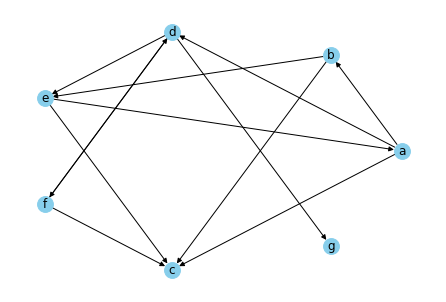

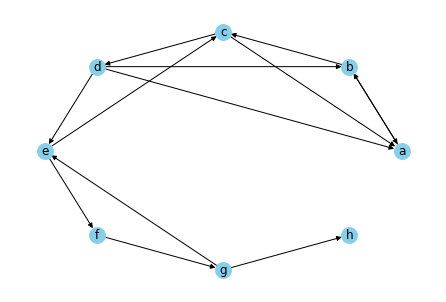

In [10]:
def cycles_unittest():
    graph1 = {'a':['b','c','d'], 'b':['c','e'], 'd':['e','f','g'], 'e':['a','c'], 'f':['d','c']}
    graph2 = {'a':['b'], 'b':['c','a'], 'c':['d', 'a'], 'd':['e','b','a'], 'e':['c','f'], 'f':['g'], 'g':['e', 'h'] }
    
    layout = nx.circular_layout
    size = 250
    print('##### Check python ####')
    print('Graph1')
    G = nx.DiGraph(graph1)
    plt.figure()
    nx.draw(G, with_labels=True, node_size=size, node_color="skyblue", pos=layout(G))
    cycles = Cycles(graph1)
    print(cycles.findCycles())
    print('Graph2')
    plt.figure()
    G = nx.DiGraph(graph2)
    nx.draw(G, with_labels=True, node_size=size, node_color="skyblue", pos=layout(G))
    cycles = Cycles(graph2)
    print(cycles.findCycles())

    
cycles_unittest()